<a href="https://colab.research.google.com/github/peppefdf/CSL_Gipuzkoa/blob/main/Outliers_Detection_Mahalanobis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
not removed!
        Fecha                 Hora   Sistema  \
0  2023-01-16  01:00:00 - 01:30:00  GI-20-10   
1  2023-01-16  01:00:00 - 01:30:00  GI-20-10   
2  2023-01-16  01:00:00 - 01:30:00  GI-20-10   
3  2023-01-16  01:30:00 - 02:00:00  GI-20-10   
4  2023-01-16  02:00:00 - 02:30:00  GI-20-10   

                                                 ETD                 Detector  \
0  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...   Central SAN SEBASTIÃN   
1  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...   RÃ¡pido SAN SEBASTIÃN   
2  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...     Lento SAN SEBASTIÃN   
3  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...     Lento SAN SEBASTIÃN   
4  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...  Central A GI-20 AÃORGA   

   0-50 (km/h)  50-80 (km/h)  80-120 (km/h)  120-255 (km/h)  \
0            0             9              1               0   
1            0       

<ipython-input-12-b0cc5635179e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_df_System.loc[:,'Hora_1']= pd.to_timedelta(data_df_System['Hora_1']).astype(int)
<ipython-input-12-b0cc5635179e>:62: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_df_System.loc[:,'Hora_2']= pd.to_timedelta(data_df_System['Hora_2']).astype(int)


Indices of outliers:
[31, 32, 33, 36, 38, 43, 79, 82, 86, 91, 122, 123, 153, 154, 157, 159, 166, 171, 178, 188, 192, 193, 198, 201, 205, 226, 227, 259, 265, 266, 272, 313, 341, 374, 381, 405, 406, 413, 420, 422, 444, 445, 448, 449, 450, 541, 559, 563, 564, 565, 566, 667, 672, 673, 789, 792, 793, 794, 816, 819, 822, 826, 833, 858, 870, 874, 880, 910, 911, 944, 964, 971, 1006, 1033, 1037, 1069, 1101, 1104, 1105, 1106, 1139, 1167, 1187, 1191, 1212, 1213, 1214, 1244, 1245, 1247, 1267, 1269, 1270, 1273, 1316, 1434, 1439, 1440, 1545, 1577, 1580, 1581, 1582, 1587, 1603, 1621, 1635, 1653, 1654, 1680, 1682, 1685, 1688, 1691, 1712, 1724, 1726, 1749, 1754, 1755, 1787, 1788, 1790, 1794, 1833, 1834, 1853, 1859, 1860, 1861, 1888, 1889, 1892, 1893, 1900, 1901, 1903, 1934, 1966, 1967, 1993, 1994, 1997, 1999, 2000, 2007, 2028, 2029, 2031, 2032, 2034, 2068, 2070, 2071, 2074, 2075, 2128, 2131, 2186, 2187, 2188, 2189, 2251, 2267, 2291, 2294, 2296, 2297, 2298, 2299, 2300, 2327, 2332, 2334, 2335, 2351, 2362

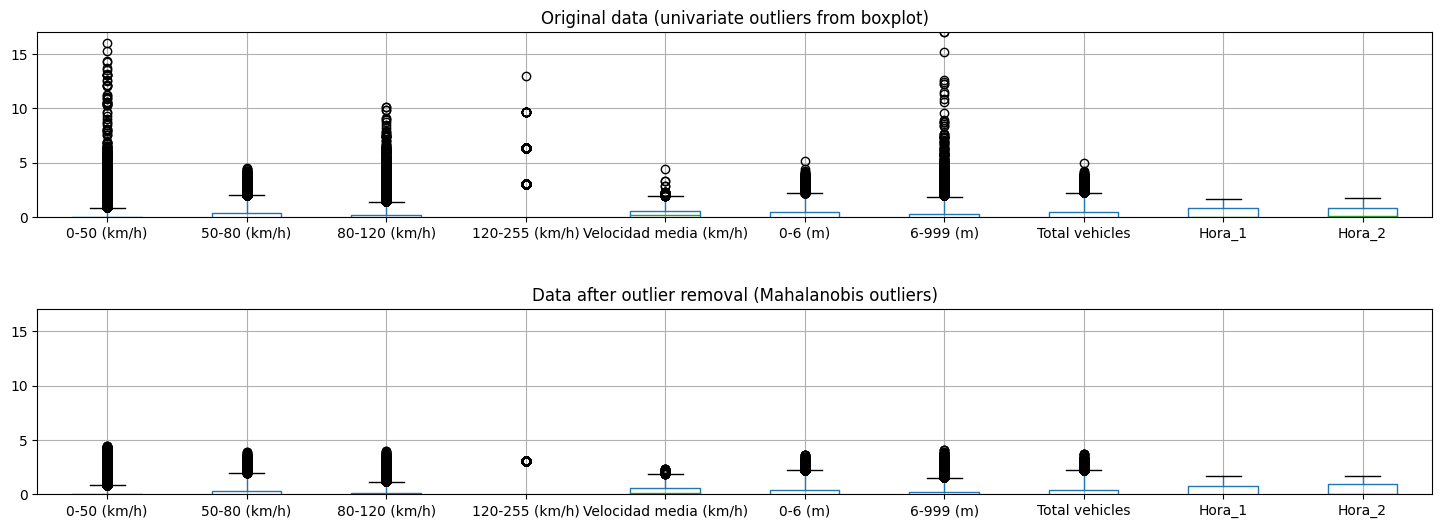

In [ ]:
%reset

import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from google.colab import drive

#import scipy as stats
from scipy.stats import chi2

# calculate
# the Mahalanobis distance
def calculateMahalanobis(Data_df):
    #y_mu = y - np.mean(data)
    y_mu = (Data_df - Data_df.mean(axis=0)).values
    cov = np.cov(Data_df.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.zeros((np.shape(left)[0],np.shape(left)[0]))
    y_mu = y_mu.T
    mahal = np.dot(left, y_mu)
    return mahal.diagonal()

year = '2023'

# Import from the API all the CSV (;) files
#filepath = '/content/drive/MyDrive/Colab Notebooks/CSL_GIPUZKOA/Proyecto Piloto_Eskuzaitzeta/DATOS_GIPUZKOA/TRAFICO/Speeds_data_file_' + str(int(year)) + '_1'+ '.csv'
filepath = '/content/drive/MyDrive/Colab Notebooks/CSL_GIPUZKOA/Proyecto Piloto_Eskuzaitzeta/DATOS_GIPUZKOA/TRAFICO/Speeds_data_file_' + str(int(year)) + '.csv'

file_len = 317733 # total length of the file

skip_rows = np.random.randint(file_len-1, size = file_len - 40000) # 40000 is the max file size we can read(?)
skip_rows = list(skip_rows)
try:
  skip_rows.remove(0) # keep the header row
  print('removed!')
except:
  print('not removed!')
  pass

#data_df = pd.read_csv(filepath, sep=",",  encoding='latin-1')
data_df = pd.read_csv(filepath, sep=",",  encoding='latin-1', skiprows=skip_rows, header=0)
print(data_df.head())
print('Sistemas:')
print(data_df['Sistema'].unique())
print(data_df[['Sistema']])
names = data_df.columns.tolist()
print('names')
print(names)

#data_df_System = data_df.loc[data_df['Sistema'] == 'A-15']
data_df_System = data_df.copy()

data_df_System[['Hora_1','Hora_2']] = data_df_System['Hora'].str.split('-',expand=True)
data_df_System.drop(['Fecha','Sistema', 'Hora', 'Detector', 'ETD', 'Unnamed: 13'], axis=1, inplace=True)
data_df_System.columns.values[-3] = "Total vehicles"

#data_df_System.loc[:,'Fecha']=pd.to_datetime(data_df_System['Fecha']).dt.strftime("%Y%m%d")
data_df_System.loc[:,'Hora_1']= pd.to_timedelta(data_df_System['Hora_1']).astype(int)
data_df_System.loc[:,'Hora_2']= pd.to_timedelta(data_df_System['Hora_2']).astype(int)

names = data_df_System.columns.tolist()
print('names')
print(names)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(data_df_System.to_numpy())
data_df_System = pd.DataFrame(df_scaled, columns=names)

data_df_Mahalanobis = data_df_System.copy()

# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
data_df_Mahalanobis['Mahalanobis'] = calculateMahalanobis(data_df_Mahalanobis)

# calculate p-value for each mahalanobis distance
data_df_Mahalanobis['p'] = 1 - chi2.cdf(data_df_Mahalanobis['Mahalanobis'], df=len(names))
#Out_ind = data_df_Mahalanobis.index[data_df_Mahalanobis['p'] < 0.005].tolist()
Out_ind = data_df_Mahalanobis.index[data_df_Mahalanobis['p'] < 0.01].tolist()
print('Indices of outliers:')
print(Out_ind)

X_noOut_df = data_df_System.drop(index=Out_ind)
X_noOut_df = X_noOut_df.astype(float)

fig, ax = plt.subplots(2, 1, figsize=(18, 6))
max_scale = max(data_df_System[names].max())
ax[0].title.set_text('Original data (univariate outliers from boxplot)')
ax[1].title.set_text('Data after outlier removal (Mahalanobis outliers)')
ax[0].set_ylim([0, max_scale])
ax[1].set_ylim([0, max_scale])
plt.subplots_adjust(hspace=0.5)

data_df_System.boxplot(column= names, ax=ax[0])
X_noOut_df.boxplot(column=names, ax=ax[1])

print('Number of outliers:')
print(len(data_df_System)-len(X_noOut_df))
